# Experimenting with Various Models for Text Summary Generation

This Colab demonstrate how to use the large langauge model (LLM) such as gpt for high quality summary generation for a given long text (original document such as TDoc). In order to generate a summary from the original text (in word file), experiments have been performed with different gpt models, customization to the prompt and parameters. The prompt and parameters are carefully designed so that the LLM model overfitting or underfitting does not occur. The performance of the generated summary is evaluated by using different metrics such as semantic similarity and n-gram based similarty. Finally, a suitable prompt and parameters are proposed that can produce a summary which is easy to follow with appropriate amout of desired details while achieving a high rating (eg. 8 out of 10 semantic score).

Following are the tasks completed:
1. Produce a text suitable for LLM input (LLM input text) from a given original docx file.
2. Generate a summary from LLM using the input text. Use LLM models such as gpt models (eg. gpt-4o, gpt-4o-mini, gpt-3.5-turbo).   
3. Customization to the prompt using appropriate inputs to the roles such as 'system', 'assistant', 'user' and avoid model overfitting with overly specific prompts, too tight constraints or underfitting with too generic prompts, lack of focus or without sufficient constraints. Fine tune the LLM input to produce a desired output. Study the summary generation behavior over other LLM parameters such as temperature in gpt.  
4. Evaluate the generated summary performance using various metrics. Produce a rating (semantic similarity) by gpt-4o using a prompt as well as other performance metrics such as BERT score, ROUGE score to evaluate the generated summary performance compared to the original input text.  
5. Provide a discussion on produced summary and data collection for fine tuning the model for performance improvements


**Installing the OpenAI Python library**. More information [here](https://github.com/openai/openai-python)

In [70]:
!pip install openai

**Installing docx2txt**  [here](https://pypi.org/project/doc2text/). This is used for extracting text from the original docx files.

In [3]:
pip install docx2txt

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=087468fda95f44e5b5f38d5184fe5ddad94a748c3ee2d9b8326bc9b2c418700d
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


**Installing the packages needed for Rouge and BERT score calculation**

**BERTScore**: This leverages BERT embeddings to calculate similarity between sentences on a semantic level rather than exact word overlap, making it more robust for abstractive summaries. A simple  description on BERTScore is can be found [here](https://medium.com/@abonia/bertscore-explained-in-5-minutes-0b98553bfb71)

**ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**: ROUGE is one of the most widely used metric for text summarization. It measures n-gram overlap between the generated and reference summaries. Common ROUGE metrics include:
ROUGE-N: Measures the overlap of n-grams (e.g., ROUGE-1 for unigrams, ROUGE-2 for bigrams). ROUGE-L: Considers the longest common subsequence. Some details of ROUGE score can be found [here](https://medium.com/@eren9677/text-summarization-387836c9e178)

In [15]:
!pip install rouge-score
# !pip install --upgrade huggingface_hub transformers
!pip install bert-score
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.1 MB/s eta 0:00:00


**Mount the google drive** Load the TDoc docx files.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the docx files**: three TDocs R1-2405962, R1-2405963, R1-2405975 from Google drive. Later use these texts to generate the corresponding summary text. Print the first 100 charaters from TDoc R1-2405962.

In [5]:
import docx2txt
input_text_R1_2405962 = docx2txt.process("/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Download_118/R1-2405962_Other aspects of AIML Model and Data.docx")
input_text_R1_2405963 = docx2txt.process("/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Download_118/R1-2405963_AIML for BM.docx")
input_text_R1_2405975 = docx2txt.process("/content/drive/MyDrive/Colab Notebooks/CapstoneProject/Download_118/Docs/R1-2405975 Discussion on specification support for beam management.docx")
print(input_text_R1_2405962[0:100])

3GPP TSG RAN WG1 #118	R1- 2405962

	Maastricht, NL, 19 Aug 2024 - 23 Aug 2024 



Agenda item:		9.1.


In [ ]:
import os
from openai import OpenAI

**Summary generation using LLM (round 1)**: Make an API request to GPT-4o (use only generic summary request). A simple prompt with low temperature parameter to avoid/minimize the randomness of the output.

In [52]:
# Generate summary using lower temperature, simple prompt and gpt-4o
import os
from openai import OpenAI
from google.colab import userdata
openAI_key = userdata.get('api_key')

client = OpenAI(
    # Open AI key
    api_key = openAI_key
)

response_R1_2405962_Simple = client.chat.completions.create(
messages = [
    {"role": "system", "content": "Generate a summary report from the text."},
    {"role": "user", "content": input_text_R1_2405962}
],
    model="gpt-4o",
    temperature=0.1,
)

In [53]:
# Extract the response content
summary_R1_2405962_simple = response_R1_2405962_Simple.choices[0].message.content

# Print the message
print(summary_R1_2405962_simple)

The document from Tejas Networks discusses various aspects of AI/ML model identification and data handling for the NR Air Interface, as part of the 3GPP TSG RAN WG1 #118 meeting held in Maastricht, NL, from August 19-23, 2024. The focus is on the study objectives approved in RAN #102 for Release 19, which include model identification, data collection, and model transfer/delivery.

Key agreements and proposals from previous RAN meetings are highlighted, including:

1. **Model Identification**: 
   - Different options for model identification are discussed, such as using data collection configurations or dataset transfers.
   - Proposals suggest using Global Cell Identity (GCI) as an associated ID and having the Network (NW) assign Model IDs.

2. **Model Transfer/Delivery**:
   - Various cases for model delivery/transfer are outlined, with a focus on Case z4, which involves transferring models in an open format.
   - Proposal 5 suggests prioritizing Alt. A for model delivery, where the U

**Rating (semantic) the generated summary in terms of relevance, coherence, completeness, conciseness**: Using openAI API to rate the summary of R1-2405962

**Relevance**: How well the summary captures key points of the original text.

**Coherence**: How logically and clearly the summary presents information.

**Completeness**: Whether all main points are covered without major omissions.

**Conciseness**: Whether the summary is appropriately brief but comprehensive.

In [54]:
# Using openAI API to rate the summary of R1-2405962.
import openai

openai.api_key = openAI_key

# Rating prompt for OpenAI API
prompt = f"""
Given the following original text and its generated summary, please evaluate the quality of the summary based on four criteria: relevance, coherence, completeness, and conciseness. For each criterion, provide a rating from 1 to 10, with 10 being the best. Then, give an overall rating.

Original Text:
{input_text_R1_2405962}

Generated Summary:
{summary_R1_2405962_simple}

Provide your response in the following format:
Relevance: [score]/10
Coherence: [score]/10
Completeness: [score]/10
Conciseness: [score]/10
Overall: [score]/10
"""

# Send the prompt to OpenAI API
response_summary_rating_R1_2405962 = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt}], # the messages format
    temperature=0.01  # Set to a low temperature for more consistent ratings
)

In [55]:
# Display response, extracting content from the message
print(response_summary_rating_R1_2405962.choices[0].message.content)

Relevance: 9/10  
The summary effectively captures the main topics discussed in the original document, such as AI/ML model identification, data handling, and model transfer/delivery for the NR Air Interface. It highlights key agreements and proposals, which are central to the document's purpose.

Coherence: 8/10  
The summary is generally coherent, with a logical flow of information. It clearly distinguishes between different sections and proposals, making it easy to follow. However, some transitions between points could be smoother to enhance readability.

Completeness: 7/10  
While the summary covers the main points, it omits some specific details and nuances present in the original text, such as the detailed steps and alternatives for model identification and transfer. Including more of these specifics would provide a fuller picture of the document's content.

Conciseness: 8/10  
The summary is concise and avoids unnecessary details, focusing on the core aspects of the document. How

In [56]:
# Calculate the BERT score for the summary
from bert_score import score

# Calculate BERTScore
P, R, F1 = score([summary_R1_2405962_simple], [input_text_R1_2405962], lang="en", model_type="bert-base-uncased")

# Display BERTScore results
print("Precision:", P.mean().item())
print("Recall:", R.mean().item())
print("F1 Score:", F1.mean().item())

Precision: 0.623595118522644
Recall: 0.5798245668411255
F1 Score: 0.6009138822555542


In [57]:
# Calculate the ROUGE score for the summary text
# load the packages
from evaluate import load

# Load the ROUGE metric
rouge = load("rouge")

# Calculate ROUGE scores
results = rouge.compute(predictions=[summary_R1_2405962_simple], references=[input_text_R1_2405962])

# Display ROUGE scores
print(f"rouge1:{results['rouge1']}, rouge2:{results['rouge2']}, rougeL:{results['rougeL']}, rougeLsum:{results['rougeLsum']}")

rouge1:0.12161269001982816, rouge2:0.05753968253968254, rougeL:0.07534699272967614, rougeLsum:0.11566424322538005


**Summary generation using LLM (round 2)**: Temperature parameter 1.5 with simple prompt is used. Make an API request to GPT-4o (use only generic summary request).



In [59]:
# Generate summary using high temperature, simple prompt and gpt-4o
import os
from openai import OpenAI
from google.colab import userdata
openAI_key = userdata.get('api_key')

client = OpenAI(
    # Open AI key
    api_key = openAI_key
)

response_R1_2405962_Simple_temp1p5 = client.chat.completions.create(
messages = [
    {"role": "system", "content": "Generate a summary report from the text."},
    {"role": "user", "content": input_text_R1_2405962}
],
    model="gpt-4o",
    temperature=1.5,
)

In [60]:
# Extract the response content
summary_R1_2405962_simple_temp1p5 = response_R1_2405962_Simple_temp1p5.choices[0].message.content

# Print the message
print(summary_R1_2405962_simple_temp1p5)

The summary report pertains to discussions at the 3GPP TSG RAN WG1 meeting held in Maastricht, NL, related to AI/ML application on NR Air Interface, stemming from agreements at prior meetings outlined in TR 38.843. It addresses various aspects of model identification and delivery. Key objectives include facilitating data collection from UE for AI models, analyzing data retrieval mechanisms' specifics from the previous FS_NR_AIML_Air study, contemplating model identification strategies, and model transfer logistics within telecommunications setup.

Highlighted are agreements from prior gathering notes... Option 2 model structure for swapping; necessitating centralized coordination exists firmified residential...one-labelled undertaking conclusion iterate structured-tests/cloud/verifications, options/testing/detail-based initial setup methodologies unaffectedly IDs grow optionly extensively entails binary opus only attributes adher íTemple prior simply sounds ubiquit Schools scenarios en

In [61]:
# Rate (semantic) the summary with gpt model
import openai

openai.api_key = openAI_key

# Rating prompt for OpenAI API
prompt = f"""
Given the following original text and its generated summary, please evaluate the quality of the summary based on four criteria: relevance, coherence, completeness, and conciseness. For each criterion, provide a rating from 1 to 10, with 10 being the best. Then, give an overall rating.

Original Text:
{input_text_R1_2405962}

Generated Summary:
{summary_R1_2405962_simple_temp1p5}

Provide your response in the following format:
Relevance: [score]/10
Coherence: [score]/10
Completeness: [score]/10
Conciseness: [score]/10
Overall: [score]/10
"""

# Send the prompt to OpenAI API
response_summary_rating_R1_2405962_temp1p5 = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt}], # the messages format
    temperature=0.01  # Set to a low temperature for more consistent ratings
)

In [62]:
# Display response, extracting content from the message
print(response_summary_rating_R1_2405962_temp1p5.choices[0].message.content)

Relevance: 3/10  
The generated summary attempts to address the main topics of the original text, such as AI/ML model identification and delivery in the context of NR Air Interface. However, it fails to accurately capture the specific details and proposals discussed in the original document. The summary includes irrelevant and nonsensical content that detracts from its relevance.

Coherence: 2/10  
The summary lacks coherence, as it contains a significant amount of gibberish and disjointed phrases that do not form a logical narrative. The presence of random words and phrases makes it difficult to follow the intended message or understand the key points being summarized.

Completeness: 2/10  
The summary does not adequately cover the main points and proposals outlined in the original text. Important details about model identification options, model transfer cases, and specific proposals are either missing or not clearly articulated. The summary fails to provide a comprehensive overview 

In [63]:
from bert_score import score

# Calculate BERTScore
P, R, F1 = score([summary_R1_2405962_simple_temp1p5], [input_text_R1_2405962], lang="en", model_type="bert-base-uncased")

# Display BERTScore results
print("Precision:", P.mean().item())
print("Recall:", R.mean().item())
print("F1 Score:", F1.mean().item())

Precision: 0.4913842976093292
Recall: 0.573445200920105
F1 Score: 0.5292527675628662


In [64]:
# load the packages
from evaluate import load

# Load the ROUGE metric
rouge = load("rouge")

# Calculate ROUGE scores
results = rouge.compute(predictions=[summary_R1_2405962_simple_temp1p5], references=[input_text_R1_2405962])

# Display ROUGE scores
print(f"rouge1:{results['rouge1']}, rouge2:{results['rouge2']}, rougeL:{results['rougeL']}, rougeLsum:{results['rougeLsum']}")

rouge1:0.0626491646778043, rouge2:0.0191044776119403, rougeL:0.03520286396181384, rougeLsum:0.05847255369928401


**The impact of higher value of temperature parameter**: Simple prompt (without specifying the domain, common terms to use etc), but a higher temperature parameter such as 1.5 produces unacceptable summary report. This is apparent from lower rating from gpt-4o, BERTScore and ROUGE score as well.

**Summary generation using LLM (round 3)**: Specifying details in the prompt without model overfitting. Define the specific character "3GPP Standard Delegate"  specify the domain "RAN (Radio Access Network) Working Group 1 (WG1) for 5G/6G standardization" and output tone/terms  "common in 3GPP"

In [9]:
# Generate summary using lower temperature, specific prompt and gpt-4o
import os
from openai import OpenAI
from google.colab import userdata
openAI_key = userdata.get('api_key')

client = OpenAI(
    # Open AI key
    api_key = openAI_key
)

response_R1_2405962 = client.chat.completions.create(
messages = [
    {"role": "system", "content": "You are acting as a 3GPP Standard Delegate specializing in the RAN (Radio Access Network) Working Group 1 (WG1) for 5G/6G standardization. Generate a summary report from the text using terms common in 3GPP."},
    {"role": "user", "content": input_text_R1_2405962}
],
    model="gpt-4o",
    temperature=0.01,
)


In [12]:
# Extract the response content
summary_R1_2405962_v1 = response_R1_2405962.choices[0].message.content

# Print the message
print(summary_R1_2405962_v1)

**3GPP TSG RAN WG1 #118 Summary Report**

**Meeting Details:**
- Location: Maastricht, NL
- Date: 19 Aug 2024 - 23 Aug 2024
- Agenda Item: 9.1.3.3
- Source: Tejas Networks
- Document for: Discussion and Decision

**Discussion Overview:**
The meeting focused on the ongoing study of AI/ML integration into the NR air interface as part of the Rel-19 Work Item (WI) approved in RAN #102. The study objectives, as outlined in RP-234039, include model identification, data collection mechanisms, and model transfer/delivery.

**Key Agreements and Proposals:**

1. **Model Identification:**
   - **MI-Option 1:** Focus on model identification with data collection configurations and indications. The network (NW) assigns Model IDs, which are linked to associated IDs, potentially using Global Cell Identity (GCI) for consistency.
   - **MI-Option 2:** Dataset transfer from NW to UE, with the NW assigning Model IDs associated with the dataset.

2. **Model Transfer/Delivery:**
   - **Case z4 (Known Model 

In [24]:
# Rate (semantic) the summary with gpt model
import openai

openai.api_key = openAI_key

# Rating prompt for OpenAI API
prompt = f"""
Given the following original text and its generated summary, please evaluate the quality of the summary based on four criteria: relevance, coherence, completeness, and conciseness. For each criterion, provide a rating from 1 to 10, with 10 being the best. Then, give an overall rating.

Original Text:
{input_text_R1_2405962}

Generated Summary:
{summary_R1_2405962_v1}

Provide your response in the following format:
Relevance: [score]/10
Coherence: [score]/10
Completeness: [score]/10
Conciseness: [score]/10
Overall: [score]/10
"""

# Send the prompt to OpenAI API
response_summary_rating_R1_2405962 = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt}], # the messages format
    temperature=0.01  # Set to a low temperature for more consistent ratings
)

In [23]:
# Display response, extracting content from the message
print(response_summary_rating_R1_2405962.choices[0].message.content)

Relevance: 9/10  
The summary captures the main points of the original text, focusing on the key aspects of AI/ML integration into the NR air interface, including model identification and transfer/delivery. It highlights the significant proposals and agreements discussed during the meeting, which are central to the document's purpose.

Coherence: 8/10  
The summary is generally coherent, presenting the information in a logical order that follows the structure of the original text. However, some transitions between sections could be smoother to enhance the overall flow of information.

Completeness: 7/10  
While the summary covers the main topics and proposals, it omits some specific details and nuances present in the original text, such as the detailed steps and options for model identification and transfer. Including these details would provide a more comprehensive understanding of the discussions.

Conciseness: 9/10  
The summary is concise, effectively distilling a lengthy and compl

Calculating BERT score for the generated summary for TDoc R1-2405962

In [17]:
from bert_score import score

# Calculate BERTScore
P, R, F1 = score([summary_R1_2405962_v1], [input_text_R1_2405962], lang="en", model_type="bert-base-uncased")

# Display BERTScore results
print("Precision:", P.mean().item())
print("Recall:", R.mean().item())
print("F1 Score:", F1.mean().item())

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Precision: 0.6421751976013184
Recall: 0.6501129269599915
F1 Score: 0.6461197137832642


Calculating ROUGE score for the generated summary.

In [16]:
# load the packages
from evaluate import load

# Load the ROUGE metric
rouge = load("rouge")

# Calculate ROUGE scores
results = rouge.compute(predictions=[summary_R1_2405962_v1], references=[input_text_R1_2405962])

# Display ROUGE scores
print(f"rouge1:{results['rouge1']}, rouge2:{results['rouge2']}, rougeL:{results['rougeL']}, rougeLsum:{results['rougeLsum']}")

rouge1:0.15717981888745147, rouge2:0.09449838187702266, rougeL:0.11448900388098318, rougeLsum:0.1520051746442432


**Summary generation performance**

As confirmed through, openAI API overall score of 8/10 and BERT score (Precision, Recall, F1 Score) above 0.6 has been achieved. The OpenAI API and BERT score evaluates the summary at the semantic level compared to the original document. On the other hand, ROUGE score measures the overlap of the words. Therefore, it is reasonable to have low ROUGE score for the generated summary. As such the generated summary can be considered a good/high quality summary in terms of meaning, relevance, coherence, and readability rather than relying on exact word matches.

After specifying specific details in the prompt such as specifying the 3GPP domain, standard delegation role, 3GPP common terms, the produced BERT score has been improved (notice the Recall is higher than 0.6 compared to the round 1 and 2 summary generation). However, the output does not present in more convenient/presentable format including the details such as meeting ID, TDoc number, agenda item, source company etc.    


**Summary generation using LLM (round 4)**: Update the prompt with more clarity in the prompt with system, assistant, user roles. Specify some desired details in the output along with generic terms etc.

In [25]:
# Generate summary using lower temperature, specific prompt with output format for proposals and observations and gpt-4o
client = OpenAI(
    api_key=openAI_key
)

response_R1_2405975 = client.chat.completions.create(
messages = [
    {"role": "system", "content": "You are acting as a 3GPP Standard Delegate specializing in the RAN (Radio Access Network) Working Group 1 (WG1) for 5G/6G standardization. Generate a summary report from the text using terms common in 3GPP."},
    {"role": "assistant", "content": "Title of the summary is 'Document summary: Document title, document number. Include the document title, meeting number, agenda item, document number, title, source, document for, location information at the top of the summary. Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary. If explanations or reasons for such observation is described in the document, provide a brief summary."},
    {"role": "system", "content": "Some documents list proposals as items for example, 'proposal 1', 'proposal 2' etc. If such proposals exists in the document, include such proposals in the summary."},
    {"role": "assistant", "content": "An explaination for the proposal is usally provided. Include such explaination in the summary."},
    {"role": "system", "content": "Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary."},
    {"role": "user", "content": input_text_R1_2405975}
],
    model="gpt-4o",
    temperature=0.01,
)



NameError: name 'message_content_R1_2405963_gpt4_temp0_v14' is not defined

In [28]:
# Extract the response content
summary_R1_2405975_v1 = response_R1_2405975.choices[0].message.content
# Print the message
print(summary_R1_2405975_v1)

**Document Summary:**

**Document Title:** Discussion on specification support for beam management  
**Meeting Number:** 3GPP TSG RAN WG1 #118  
**Agenda Item:** 9.1.1  
**Document Number:** R1-2405975  
**Source:** CMCC  
**Document For:** Discussion & Decision  
**Location:** Maastricht, Netherlands, August 19th–August 23rd, 2024  

**Summary:**

This document discusses the specification impacts of AI-based beam management, focusing on data collection, inference, and monitoring procedures. It builds on agreements from the RAN1#117 meeting regarding AI/ML models for beam management.

**Key Agreements:**

1. **Performance Monitoring:**
   - **Type 1 Monitoring:** Includes NW-side and UE-assisted options for performance metric calculation and reporting.
   - **Type 2 Monitoring:** Involves UE decision-making for model operations, with network configuration support.

2. **L1-RSRP Reporting:**
   - Support for differential L1-RSRP reporting with legacy quantization steps.
   - Considerati

In [29]:
# Rate (semantic) the summary with gpt model
import openai

openai.api_key = openAI_key

# Rating prompt for OpenAI API
prompt = f"""
Given the following original text and its generated summary, please evaluate the quality of the summary based on four criteria: relevance, coherence, completeness, and conciseness. For each criterion, provide a rating from 1 to 10, with 10 being the best. Then, give an overall rating.

Original Text:
{input_text_R1_2405975}

Generated Summary:
{summary_R1_2405975_v1}

Provide your response in the following format:
Relevance: [score]/10
Coherence: [score]/10
Completeness: [score]/10
Conciseness: [score]/10
Overall: [score]/10
"""

# Send the prompt to OpenAI API
response_summary_rating_R1_2405975 = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt}], # the messages format
    temperature=0.01  # Set to a low temperature for more consistent ratings
)

In [30]:
# Display response, extracting content from the message
print(response_summary_rating_R1_2405975.choices[0].message.content)

Relevance: 9/10  
The summary captures the main themes and key agreements from the original document, focusing on AI-based beam management, data collection, inference, and monitoring procedures. It highlights the important aspects of performance monitoring, L1-RSRP reporting, and proposals for training data collection and inference procedures. However, it could include more specific details about the proposals and agreements to fully reflect the document's content.

Coherence: 8/10  
The summary is generally coherent, with a logical flow that follows the structure of the original document. It effectively organizes the information into sections such as key agreements, proposals, and conclusions. However, some sections could be better connected to enhance the overall readability and understanding of the summary.

Completeness: 7/10  
While the summary covers the main points, it lacks some specific details and nuances present in the original document. For instance, it could provide more i

In [31]:
from bert_score import score

# Calculate BERTScore
P, R, F1 = score([summary_R1_2405975_v1], [input_text_R1_2405975], lang="en", model_type="bert-base-uncased")

# Display BERTScore results
print("Precision:", P.mean().item())
print("Recall:", R.mean().item())
print("F1 Score:", F1.mean().item())

Precision: 0.6275471448898315
Recall: 0.6654664874076843
F1 Score: 0.6459508538246155


In round 4 of summary generation, a rating 8/10 is achieved while above 0.6 BERT Score (in all Precision, Recall and F1 Score).

**Summary generation using LLM (round 5)**: Use the same prompt of Round 4 for a slightly higher temperature value (0.7).

In [32]:
# Generate summary using lower temperature, specific prompt and gpt-4o for TDoc R1-2405975 (verify the consistency of the current prompt for producing output)
client = OpenAI(
    api_key=openAI_key
)

response_R1_2405975_temp07 = client.chat.completions.create(
messages = [
    {"role": "system", "content": "You are acting as a 3GPP Standard Delegate specializing in the RAN (Radio Access Network) Working Group 1 (WG1) for 5G/6G standardization. Generate a summary report from the text using terms common in 3GPP."},
    {"role": "assistant", "content": "Title of the summary is 'Document summary: Document title, document number. Include the document title, meeting number, agenda item, document number, title, source, document for, location information at the top of the summary. Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary. If explanations or reasons for such observation is described in the document, provide a brief summary."},
    {"role": "system", "content": "Some documents list proposals as items for example, 'proposal 1', 'proposal 2' etc. If such proposals exists in the document, include such proposals in the summary."},
    {"role": "assistant", "content": "An explaination for the proposal is usally provided. Include such explaination in the summary."},
    {"role": "system", "content": "Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary."},
    {"role": "user", "content": input_text_R1_2405975}
],
    model="gpt-4o",
    temperature=0.7,
)

In [33]:
# Extract the response content
summary_R1_2405975_temp07 = response_R1_2405975_temp07.choices[0].message.content
# Print the message
print(summary_R1_2405975_temp07)

**Document Summary:**

**Document Title:** Discussion on Specification Support for Beam Management  
**Meeting Number:** 3GPP TSG RAN WG1 #118  
**Agenda Item:** 9.1.1  
**Document Number:** R1-2405975  
**Source:** CMCC  
**Document For:** Discussion & Decision  
**Location:** Maastricht, Netherlands, August 19th–23rd, 2024  

**Introduction:**

The document discusses the specification impacts of AI-based beam management, building on agreements from the RAN1#117 meeting regarding UE-side AI/ML models, performance monitoring, and reporting. The focus is on data collection, inference, and monitoring in different beam management cases.

**Agreements from Previous Meetings:**

1. **Performance Monitoring:** 
   - Two options for Type 1 performance monitoring: NW-side and UE-assisted.
   - Support for differential L1-RSRP reporting with legacy quantization steps.
   - Inference results for UE-sided models to include predicted RSRP.

2. **Beam Reporting:**
   - NW-sided models to report L1-

gpt-4o rating of the generated summary (the  summary also generated from gpt-40)

In [34]:
# Rate (semantic) the summary with gpt model
import openai

openai.api_key = openAI_key

# Rating prompt for OpenAI API
prompt_temp07 = f"""
Given the following original text and its generated summary, please evaluate the quality of the summary based on four criteria: relevance, coherence, completeness, and conciseness. For each criterion, provide a rating from 1 to 10, with 10 being the best. Then, give an overall rating.

Original Text:
{input_text_R1_2405975}

Generated Summary:
{summary_R1_2405975_temp07}

Provide your response in the following format:
Relevance: [score]/10
Coherence: [score]/10
Completeness: [score]/10
Conciseness: [score]/10
Overall: [score]/10
"""

# Send the prompt to OpenAI API
response_summary_rating_R1_2405975_temp07 = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt_temp07}], # the messages format
    temperature=0.01  # Set to a low temperature for more consistent ratings
)

In [35]:
# Display response, extracting content from the message
print(response_summary_rating_R1_2405975_temp07.choices[0].message.content)

Relevance: 9/10  
The summary captures the main points of the original document, focusing on the specification impacts of AI-based beam management, performance monitoring, data collection, and reporting. It highlights key agreements and proposals, which are central to the document's purpose.

Coherence: 8/10  
The summary is generally coherent, with a logical flow from the introduction to the proposals and conclusion. However, some sections could be better connected to enhance the overall readability and understanding of the document's structure.

Completeness: 7/10  
While the summary covers many important aspects, it omits some specific details and nuances present in the original text, such as the detailed discussion on the necessity of Top-K beam sweeping and the specific configurations for different beam management cases. Including these details would provide a more comprehensive overview.

Conciseness: 8/10  
The summary is concise and effectively condenses a lengthy and complex d

BERT Score

In [36]:
from bert_score import score

# Calculate BERTScore
P, R, F1 = score([summary_R1_2405975_temp07], [input_text_R1_2405975], lang="en", model_type="bert-base-uncased")

# Display BERTScore results
print("Precision:", P.mean().item())
print("Recall:", R.mean().item())
print("F1 Score:", F1.mean().item())

Precision: 0.6426781415939331
Recall: 0.67508864402771
F1 Score: 0.6584848165512085


In round 5, a similar rating and BERT score of round 4 has been achieved.

# Performance with gpt-4o-mini

**Summary generation using LLM (round 6)**: Use the same prompt with gpt-4o-mini LLM model.  

**Model	| Token limits |	Request and other limits	| Batch queue limits**


---


gpt-4o | 30,000 TPM | 500 RPM | 90,000 TPD

gpt-4o-mini	| 200,000 TPM | 500 RPM, 10,000 RPD | 2,000,000 TPD

gpt-3.5-turbo	| 200,000 TPM | 500 RPM, 10,000 RPD | 2,000,000 TPD

In [38]:
# Generate summary using lower temperature, specific prompt and gpt-4o-mini for TDoc R1-2405975 (verify if a simpler model can be used for producing similar quality output)
client = OpenAI(
    api_key=openAI_key
)

response_R1_2405975_temp001_gpt35 = client.chat.completions.create(
messages = [
    {"role": "system", "content": "You are acting as a 3GPP Standard Delegate specializing in the RAN (Radio Access Network) Working Group 1 (WG1) for 5G/6G standardization. Generate a summary report from the text using terms common in 3GPP."},
    {"role": "assistant", "content": "Title of the summary is 'Document summary: Document title, document number. Include the document title, meeting number, agenda item, document number, title, source, document for, location information at the top of the summary. Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary. If explanations or reasons for such observation is described in the document, provide a brief summary."},
    {"role": "system", "content": "Some documents list proposals as items for example, 'proposal 1', 'proposal 2' etc. If such proposals exists in the document, include such proposals in the summary."},
    {"role": "assistant", "content": "An explaination for the proposal is usally provided. Include such explaination in the summary."},
    {"role": "system", "content": "Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary."},
    {"role": "user", "content": input_text_R1_2405975}
],
    model="gpt-4o-mini",
    temperature=0.01,
)

In [39]:
# Extract the response content
summary_R1_2405975_temp001_4omini = response_R1_2405975_temp001_gpt35.choices[0].message.content
# Print the message
print(summary_R1_2405975_temp001_4omini)

**Document Summary: Discussion on Specification Support for Beam Management**  
**Document Number:** R1-2405975  
**Meeting Number:** RAN1#118  
**Location:** Maastricht, Netherlands  
**Date:** August 19th–August 23rd, 2024  
**Source:** CMCC  
**Document For:** Discussion & Decision  

---

### Summary

This document discusses the potential specification impacts of AI-based beam management in the context of 5G/6G networks, particularly focusing on the agreements and proposals made during the RAN1#117 meeting. The key areas of focus include data collection for training, inference, and monitoring, as well as the configuration of resource sets for both NW-side and UE-side models.

#### Observations:
1. **Performance Monitoring Agreements:**
   - Type 1 performance monitoring includes NW-side and UE-assisted options, with flexibility in reporting metrics.
   - Type 2 performance monitoring involves indications from UE to gNB for performance metrics.

2. **Data Collection for NW-side Mode

gpt-4o rating of the generated summary (the  summary  generated from gpt-4o-mini)

In [41]:
# Rate (semantic) the summary with gpt model
import openai

openai.api_key = openAI_key

# Rating prompt for OpenAI API
prompt_temp07 = f"""
Given the following original text and its generated summary, please evaluate the quality of the summary based on four criteria: relevance, coherence, completeness, and conciseness. For each criterion, provide a rating from 1 to 10, with 10 being the best. Then, give an overall rating.

Original Text:
{input_text_R1_2405975}

Generated Summary:
{summary_R1_2405975_temp001_4omini}

Provide your response in the following format:
Relevance: [score]/10
Coherence: [score]/10
Completeness: [score]/10
Conciseness: [score]/10
Overall: [score]/10
"""

# Send the prompt to OpenAI API
response_summary_rating_R1_2405975_temp01_4omini = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt_temp07}], # the messages format
    temperature=0.01  # Set to a low temperature for more consistent ratings
)

In [42]:
# Display response, extracting content from the message
# gpt-4o rating of the gpt-4o-mini generated summary
print(response_summary_rating_R1_2405975_temp07.choices[0].message.content)

Relevance: 9/10  
The summary captures the main points of the original document, focusing on the specification impacts of AI-based beam management, performance monitoring, data collection, and reporting. It highlights key agreements and proposals, which are central to the document's purpose.

Coherence: 8/10  
The summary is generally coherent, with a logical flow from the introduction to the proposals and conclusion. However, some sections could be better connected to enhance the overall readability and understanding of the document's structure.

Completeness: 7/10  
While the summary covers many important aspects, it omits some specific details and nuances present in the original text, such as the detailed discussion on the necessity of Top-K beam sweeping and the specific configurations for different beam management cases. Including these details would provide a more comprehensive overview.

Conciseness: 8/10  
The summary is concise and effectively condenses a lengthy and complex d

Bert Score for generated output from gpt-40-mini

In [40]:
# Compute the BERT score
from bert_score import score

# Calculate BERTScore
P, R, F1 = score([summary_R1_2405975_temp001_4omini], [input_text_R1_2405975], lang="en", model_type="bert-base-uncased")

# Display BERTScore results
print("Precision:", P.mean().item())
print("Recall:", R.mean().item())
print("F1 Score:", F1.mean().item())

Precision: 0.6191070079803467
Recall: 0.6400259733200073
F1 Score: 0.629392683506012


ROUGE Score for generated output from gpt-40-mini

In [43]:
# Compute the Rouge score
# load the packages
from evaluate import load

# Load the ROUGE metric
rouge = load("rouge")

# Calculate ROUGE scores
results = rouge.compute(predictions=[summary_R1_2405975_temp001_4omini], references=[input_text_R1_2405975])

# Display ROUGE scores
print(f"rouge1:{results['rouge1']}, rouge2:{results['rouge2']}, rougeL:{results['rougeL']}, rougeLsum:{results['rougeLsum']}")

rouge1:0.10314104500151011, rouge2:0.0631324573327292, rougeL:0.07173059498640894, rougeLsum:0.10223497432799758


While the generated summary in round 6 has higher performance, it is clear that gpt-4o-mini did not interprete the prompt properly.

**Summary generation using LLM (round 7)**: Use the same prompt as in round 4,5,6 with gpt-4o model.  Summary generation for TDoc R1-2405963 to verify the consistency of the output. Temperature 0.1 is used instead of 0.01 (overly strict) or 0.7 (bit less strict).

In [46]:
# Generate summary using lower temperature, specific prompt and gpt-4o for TDoc R1-2405963 (verify the consistency of the current prompt for producing output)
client = OpenAI(
    api_key=openAI_key
)

response_R1_2405963_temp01 = client.chat.completions.create(
messages = [
    {"role": "system", "content": "You are acting as a 3GPP Standard Delegate specializing in the RAN (Radio Access Network) Working Group 1 (WG1) for 5G/6G standardization. Generate a summary report from the text using terms common in 3GPP."},
    {"role": "assistant", "content": "Title of the summary is 'Document summary: Document title, document number. Include the document title, meeting number, agenda item, document number, title, source, document for, location information at the top of the summary. Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary. If explanations or reasons for such observation is described in the document, provide a brief summary."},
    {"role": "system", "content": "Some documents list proposals as items for example, 'proposal 1', 'proposal 2' etc. If such proposals exists in the document, include such proposals in the summary."},
    {"role": "assistant", "content": "An explaination for the proposal is usally provided. Include such explaination in the summary."},
    {"role": "system", "content": "Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary."},
    {"role": "user", "content": input_text_R1_2405963}
],
    model="gpt-4o",
    temperature=0.1,
)

In [47]:
# Extract the response content
summary_R1_2405963_temp01 = response_R1_2405963_temp01.choices[0].message.content
# Print the message
print(summary_R1_2405963_temp01)

**Document Summary:**

**Document Title:** AI/ML for Beam Management  
**Meeting Number:** 3GPP TSG RAN WG1 #118  
**Agenda Item:** 9.1.1  
**Document Number:** R1-2405963  
**Source:** Tejas Networks  
**Document For:** Discussion and Decision  
**Location:** Maastricht, NL, 19 Aug 2024 - 23 Aug 2024  

**Introduction:**

This document discusses enhancements related to AI/ML for beam management in the context of the Rel-19 Work Item (WI) on AI/ML for NR Air Interface, as approved in RAN #102 and revised in RAN #103. The focus is on the beam management use case, with objectives derived from the FS_NR_AIML_Air study [TR 38.843].

**Objectives in RP-234039:**

- Develop a general framework for one-sided AI/ML models, focusing on signaling and protocol aspects of Life Cycle Management (LCM) for model selection, activation, deactivation, and switching.
- Establish necessary signaling/mechanisms for LCM to support model training, inference, performance monitoring, and data collection for bo

In [48]:
# Compute the BERT score
from bert_score import score

# Calculate BERTScore
P, R, F1 = score([summary_R1_2405963_temp01], [input_text_R1_2405963], lang="en", model_type="bert-base-uncased")

# Display BERTScore results
print("Precision:", P.mean().item())
print("Recall:", R.mean().item())
print("F1 Score:", F1.mean().item())

Precision: 0.6912704706192017
Recall: 0.7392131090164185
F1 Score: 0.7144384384155273


In [50]:
# Rate (semantic) the summary with gpt model
import openai

openai.api_key = openAI_key

# Rating prompt for OpenAI API
prompt_temp07 = f"""
Given the following original text and its generated summary, please evaluate the quality of the summary based on four criteria: relevance, coherence, completeness, and conciseness. For each criterion, provide a rating from 1 to 10, with 10 being the best. Then, give an overall rating.

Original Text:
{input_text_R1_2405963}

Generated Summary:
{summary_R1_2405963_temp01}

Provide your response in the following format:
Relevance: [score]/10
Coherence: [score]/10
Completeness: [score]/10
Conciseness: [score]/10
Overall: [score]/10
"""

# Send the prompt to OpenAI API
response_summary_rating_R1_2405975_temp01_4omini = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt_temp07}], # the messages format
    temperature=0.01  # Set to a low temperature for more consistent ratings
)

In [51]:
# Display response, extracting content from the message
# gpt-4o rating of the gpt-4o-mini generated summary
print(response_summary_rating_R1_2405975_temp01_4omini.choices[0].message.content)

Relevance: 9/10  
The summary effectively captures the main themes and objectives of the original document, focusing on AI/ML enhancements for beam management, the proposals, and the agreements reached. However, it could slightly improve by including more specific details about the agreements and technical aspects discussed in the original text.

Coherence: 8/10  
The summary is generally coherent, with a logical flow from the introduction to the objectives, proposals, and conclusion. However, some transitions between sections could be smoother, and the summary could benefit from clearer connections between the proposals and their implications.

Completeness: 8/10  
The summary covers most of the key points from the original text, including the objectives, proposals, and agreements. However, it omits some specific technical details and nuances, such as the detailed explanation of the NW-sided model and the performance monitoring options, which could provide a more comprehensive underst

In the above example tdoc R1-2405963 summary generation, slightly higher BERT score is achieved which reflects on the rating given by gpt-4o. As such, BERT score is reflective indication of semantic similarity.  

**Summary generation using LLM (round 8)**: Use the same prompt as in round 4,5,6,7 with gpt-4o model.  Summary generation for TDoc R1-2405975 to verify the consistency of the output. Temperature 0.1 is used instead of 0.01 (overly strict) or 0.7 (bit less strict).

In [65]:
# Generate summary using lower temperature, specific prompt and gpt-4o for TDoc R1-2405975 (verify the consistency of the current prompt for producing output)
client = OpenAI(
    api_key=openAI_key
)

response_R1_2405975_temp01 = client.chat.completions.create(
messages = [
    {"role": "system", "content": "You are acting as a 3GPP Standard Delegate specializing in the RAN (Radio Access Network) Working Group 1 (WG1) for 5G/6G standardization. Generate a summary report from the text using terms common in 3GPP."},
    {"role": "assistant", "content": "Title of the summary is 'Document summary: Document title, document number. Include the document title, meeting number, agenda item, document number, title, source, document for, location information at the top of the summary. Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary. If explanations or reasons for such observation is described in the document, provide a brief summary."},
    {"role": "system", "content": "Some documents list proposals as items for example, 'proposal 1', 'proposal 2' etc. If such proposals exists in the document, include such proposals in the summary."},
    {"role": "assistant", "content": "An explaination for the proposal is usally provided. Include such explaination in the summary."},
    {"role": "system", "content": "Some documents list observations as items, for example, 'observation 1', 'observation 2' etc. If such observations exists in the document, include such observations in the summary."},
    {"role": "user", "content": input_text_R1_2405975}
],
    model="gpt-4o",
    temperature=0.1,
)

In [66]:
# Extract the response content
summary_R1_2405975_temp01 = response_R1_2405975_temp01.choices[0].message.content
# Print the message
print(summary_R1_2405975_temp01)

**Document Summary:**

**Document Title:** Discussion on specification support for beam management  
**Meeting Number:** 3GPP TSG RAN WG1 #118  
**Agenda Item:** 9.1.1  
**Document Number:** R1-2405975  
**Source:** CMCC  
**Document For:** Discussion & Decision  
**Location:** Maastricht, Netherlands  
**Date:** August 19th–August 23rd, 2024  

**Introduction:**
This document discusses the specification impacts of AI-based beam management, focusing on agreements and proposals for both network (NW) and user equipment (UE) side models. It builds on agreements from the RAN1#117 meeting regarding AI/ML model-based beam management.

**Agreements:**
1. **Performance Monitoring for BM-Case1 and BM-Case2:**
   - Support Type 1 performance monitoring with options for NW-side and UE-assisted performance monitoring.
   - Differential L1-RSRP reporting with legacy quantization is supported.

2. **Inference Results for UE-sided Model:**
   - Predicted RSRP is based on AI/ML output for BM-Case 2.



In [67]:
# Rate (semantic) the summary with gpt model
import openai

openai.api_key = openAI_key

# Rating prompt for OpenAI API
prompt_temp01 = f"""
Given the following original text and its generated summary, please evaluate the quality of the summary based on four criteria: relevance, coherence, completeness, and conciseness. For each criterion, provide a rating from 1 to 10, with 10 being the best. Then, give an overall rating.

Original Text:
{input_text_R1_2405975}

Generated Summary:
{summary_R1_2405975_temp01}

Provide your response in the following format:
Relevance: [score]/10
Coherence: [score]/10
Completeness: [score]/10
Conciseness: [score]/10
Overall: [score]/10
"""

# Send the prompt to OpenAI API
response_summary_rating_R1_2405975_temp01 = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{"role": "user", "content": prompt_temp01}], # the messages format
    temperature=0.01  # Set to a low temperature for more consistent ratings
)

In [68]:
# Extract the response content
rating_summary_R1_2405975_temp01 = response_summary_rating_R1_2405975_temp01.choices[0].message.content
# Print the message
print(rating_summary_R1_2405975_temp01)

Relevance: 9/10  
The summary captures the main themes and key points of the original document, focusing on AI-based beam management, agreements, and proposals. However, it could include more specific details about the proposals and agreements to enhance relevance.

Coherence: 8/10  
The summary is generally coherent, with a logical flow from introduction to agreements, proposals, and conclusion. However, some sections could be better connected to improve the overall narrative and understanding.

Completeness: 7/10  
While the summary covers the main points, it lacks some specific details and nuances present in the original text, such as the detailed proposals and technical aspects of the agreements. Including these would provide a more comprehensive overview.

Conciseness: 8/10  
The summary is concise and avoids unnecessary details, but it could be slightly more concise by eliminating some repetitive phrases and focusing on the most critical aspects of the document.

Overall: 8/10  


In [69]:
# Compute the BERT score
from bert_score import score

# Calculate BERTScore
P, R, F1 = score([input_text_R1_2405975], [summary_R1_2405975_temp01], lang="en", model_type="bert-base-uncased")

# Display BERTScore results
print("Precision:", P.mean().item())
print("Recall:", R.mean().item())
print("F1 Score:", F1.mean().item())

Precision: 0.6803195476531982
Recall: 0.6417273283004761
F1 Score: 0.6604601740837097


**LLM (gpt) overall rating and BERT F1 score over temperature parameter**:
- The following plot shows the performance score such as gpt overall score and BERT F1 score against the temaperature value.  
- As observed, small values of temperature achieves higher scores (semantic)

<Axes: xlabel='Temperature value', ylabel='BERT F1 score'>

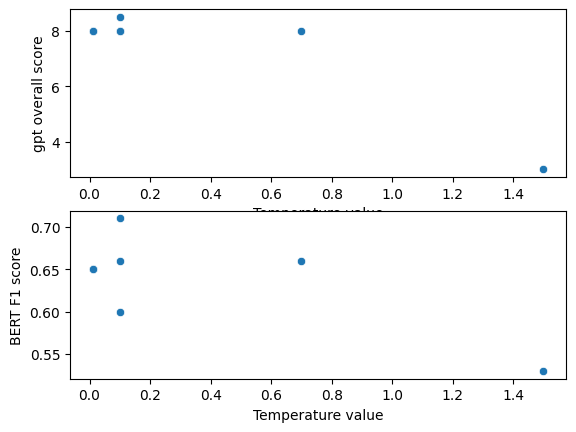

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

temperature_value = [0.1, 1.5, 0.01, 0.01, 0.7, 0.1, 0.1]
gpt_overall_score = [8, 3, 8, 8, 8, 8.5, 8]
BERT_F1_score = [0.60, 0.53, 0.65, 0.65, 0.66, 0.71, 0.66]
data = np.array([temperature_value, gpt_overall_score, BERT_F1_score])
data_df = pd.DataFrame(data=data.T, columns = ['Temperature value', 'gpt overall score', 'BERT F1 score'])

fig, axes = plt.subplots(2, 1)
sns.scatterplot(data=data_df, x='Temperature value', y='gpt overall score', ax=axes[0])
sns.scatterplot(data=data_df, x='Temperature value', y='BERT F1 score', ax=axes[1])

As observed from the gpt based semantic rating and BERT score, lower value of temperature is a preferred choice for summary generation.  

# Discussion
**Summary generation**: LLM (gpt) openAI prompt can be used effectively for text summary generation. Different model such as gpt-4o, gpt-4o-mini, gpt-3.5-turbo have been tested. The generated summary performance is evaluated through gpt-4o semantic rating, BERT score (another semantic score) and ROUGE score (n-gram based).

**Docx file processing for preparing LLM input text**: The original text in word (docx) format is transformed to text first. This text is passed to openAI API through as the input.

**Impact of the model**: gpt-4o found to generate the best overall summary. The generated gpt-4o-mini does not interprete the prompt properly. Tests show that gpt-3.5-turbo does not have sufficient input tokens (because 16,385 tokens limit). The prompt is very important to define carefully with appropriate instructions specifying roles such as system, assistant and user. Lower values of temperature parameters such as 0.01, 0.1, 0.7 are more suitable to produce consistent and accurate summary. The prompt requires careful attention to avoid LLM model overfitting and underfitting.

**Performance of the proposed approach**: The proposed LLM based summary generation has high semantic similiarity scores such gpt-4o rating and BERT score. As abstract summary generation is preferred over extractive summary for the project, high semantic rating is preferred. On the other hand, as expected, non semantic based ROUGE score does not appear to reflect the performance accurately. Therefore, a semantic based performance metric is more suitable metric for evaluating the performance of the TDoc summary generation task.  

**Final model**: Appropriate model (gpt-4o) with appropriate prompt can produce high quality summary (gpt-4o semantic rating of 8 and higher, and BERT score 0.6 and higher).

**Fine tuning to improve the model by user rated summaries**: As ground truth/reference summaries do not exist at the moment. Therefore, semantic score can not be calculated using sample reference/human summaries. As a next step, it is proposed to gather generated summaries along with user input ratings and use such collected data (user rated summaries) to fine-tune the LLM further.  